# Examen 3- Punto 2

# valores y vectores propios de imagenes de un video

## Importando librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Extrayendo 30 imagenes del video y llevando las imagenes a una matriz H

In [2]:

# Path to your input video file
video_path = 'data/input video/jellyfish.mp4'

# Directory to save the extracted frames
output_directory = 'data/output/'

# Initialize frame counter
frame_count = 0

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Set the interval to extract frames
frame_interval = total_frames // 30

# Width and height for the resized frames
width, height = 600, 400

# Initialize a list to store the frames as columns
frames_list = []

# Create the output directory if it doesn't exist
import os
os.makedirs(output_directory, exist_ok=True)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Save frames at the specified intervals
    if frame_count % frame_interval == 0:
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Resize the frame to the desired width and height
        resized_frame = cv2.resize(gray_frame, (width, height))

        # Flatten the frame into a 1D array and append to the frames_list
        frames_list.append(resized_frame.flatten())

    frame_count += 1

    # Break the loop when 30 frames have been saved
    if frame_count // frame_interval == 30:
        break

# Release the video capture object
cap.release()

# Convert the frames_list to a 240,000 x 30 matrix
H = np.array(frames_list).T

print("Matrix H has been created with dimensions:", H.shape)


Matrix H has been created with dimensions: (240000, 30)


## Substrayendo el promedio de cada fila - Matriz A

In [3]:
# Calculate the mean (average) of each row and convert it to a column vector
row_means = np.mean(H, axis=1, keepdims=True)

# Subtract the row means from each row of H
A = H - row_means
print(A.shape)

(240000, 30)


## Calculando valores y vectores propios de AT_A

In [4]:
AT=np.transpose(A)
AT_A=AT@A

print("Shape de A: ", A.shape)
print("Shape de AT: ", AT.shape)
print("Shape de AT_A: ",AT_A.shape)

Shape de A:  (240000, 30)
Shape de AT:  (30, 240000)
Shape de AT_A:  (30, 30)


## Objetivo: Calcular los valores propios y vectores propios de A_AT.

### Se sabe que:

- Los valores propios de A_AT y AT_A son los mismos.

- Si x perteneciente a R^n es un vector propio de AT_A, entonces Ax perteneciente a R^m es vector propio de A_AT

### Por lo tanto:

Para optimizar los recursos computacionales, se calculan los valores y vectores propios de AT_A y se aplican los enunciados anteriores para encontrar los valores y vectores propios de A_AT

In [5]:
eigenvalues_ATA,eigenvectors_ATA=np.linalg.eig(AT_A)

print("Los tamaños de los valores propios de AT_A:")
print(eigenvalues_ATA.shape)

print("\nLos tamaños de los vectores propios de AT_A:")
print(eigenvectors_ATA.shape)

Los tamaños de los valores propios de AT_A:
(30,)

Los tamaños de los vectores propios de AT_A:
(30, 30)


### Valores y vectores propios de A_AT

In [6]:
eigvalues_AAT = eigenvalues_ATA  # Los valores propios son los mismos
eigvectors_AAT = np.dot(A, eigenvectors_ATA)  # Calcula los vectores propios correspondientes


print("Los tamaños de los valores propios de A_AT:")
print(eigvalues_AAT.shape)

print("\nLos tamaños de los vectores propios de A_AT:")
print(eigvectors_AAT.shape)

Los tamaños de los valores propios de A_AT:
(30,)

Los tamaños de los vectores propios de A_AT:
(240000, 30)


## Representando los vectores propios de A_AT como imagenes

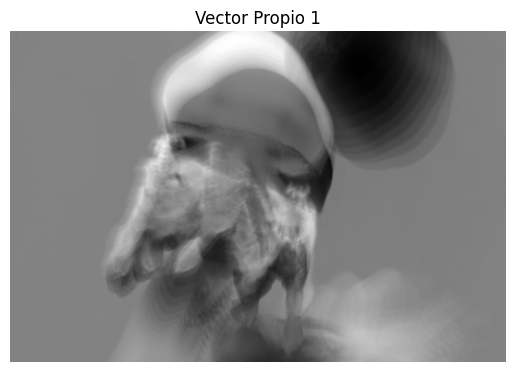

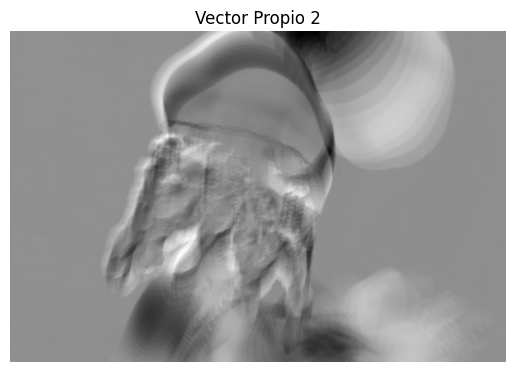

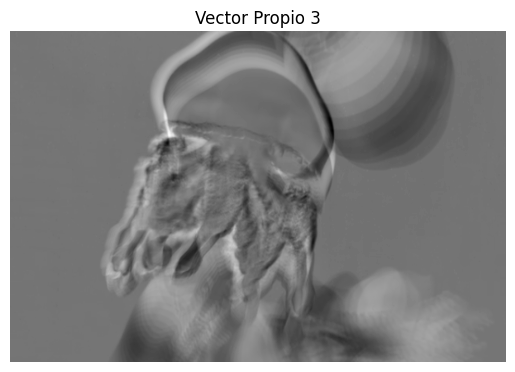

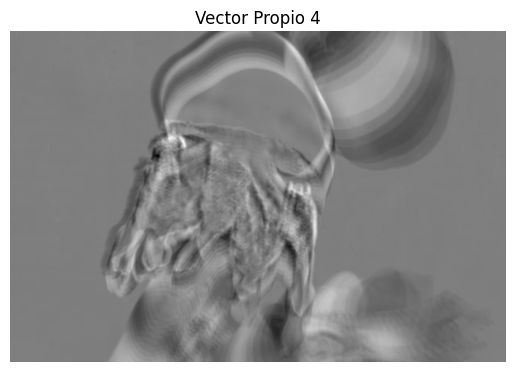

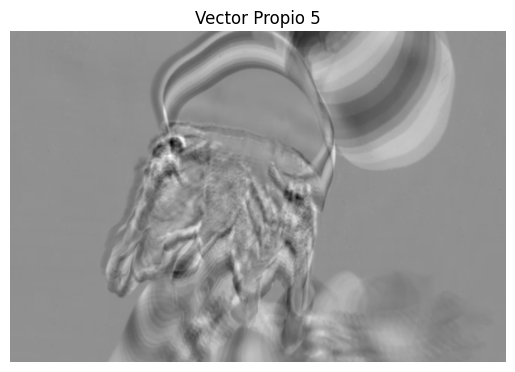

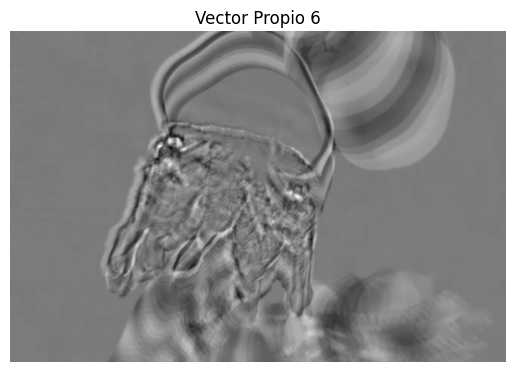

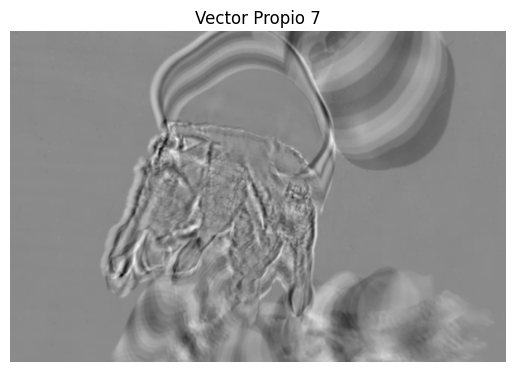

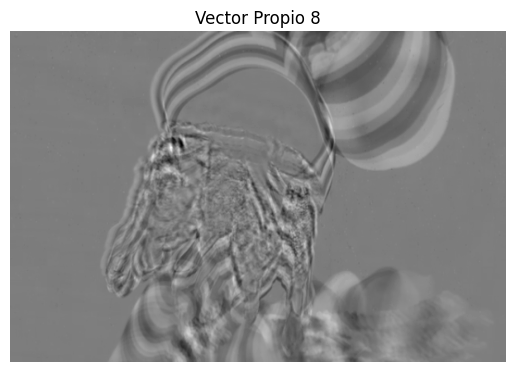

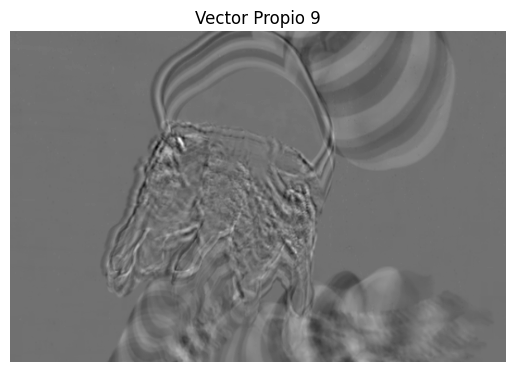

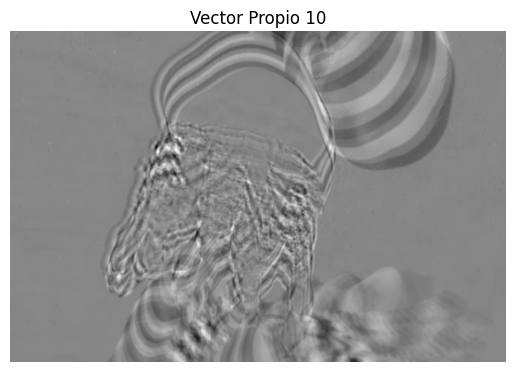

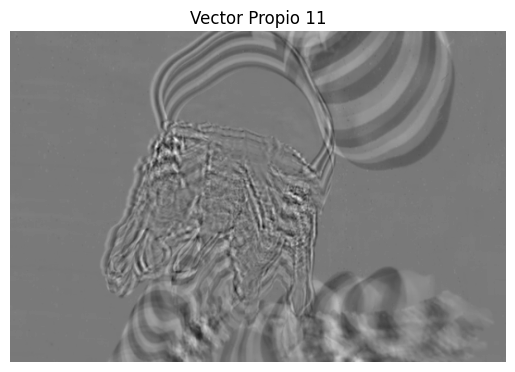

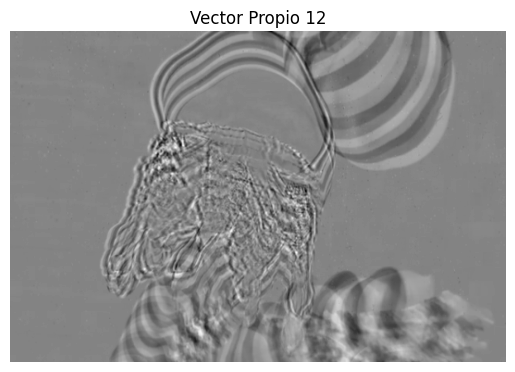

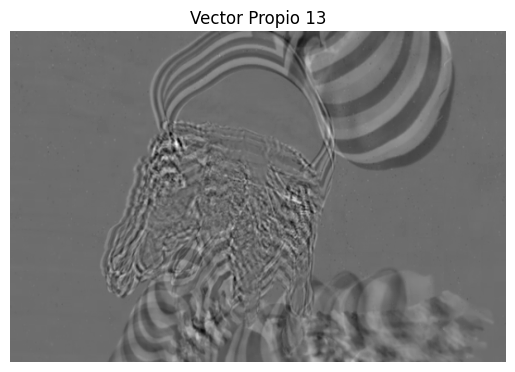

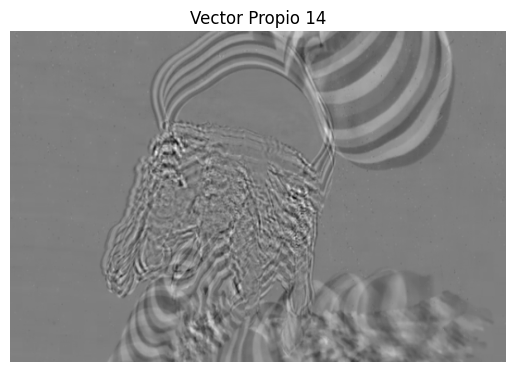

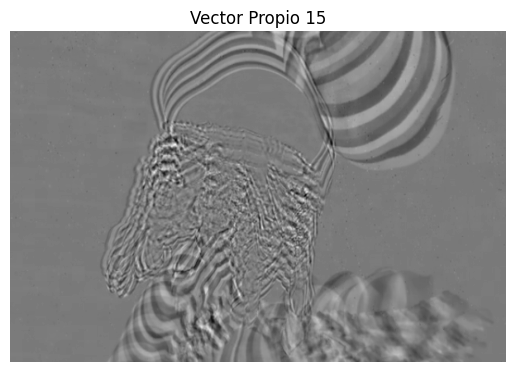

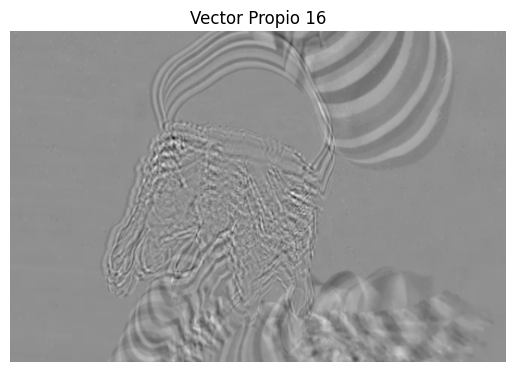

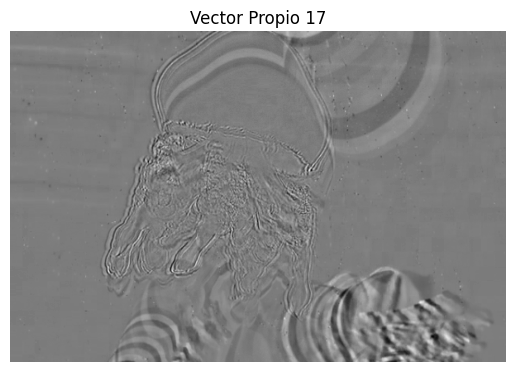

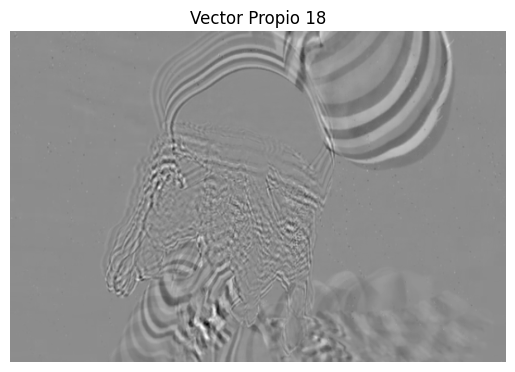

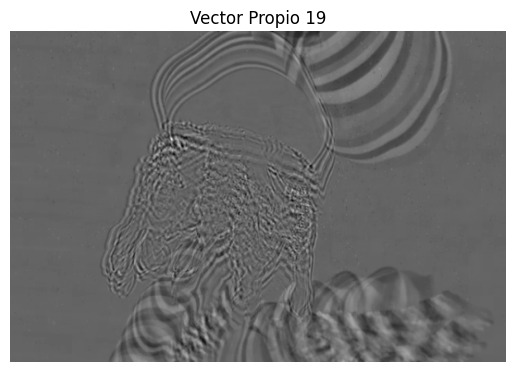

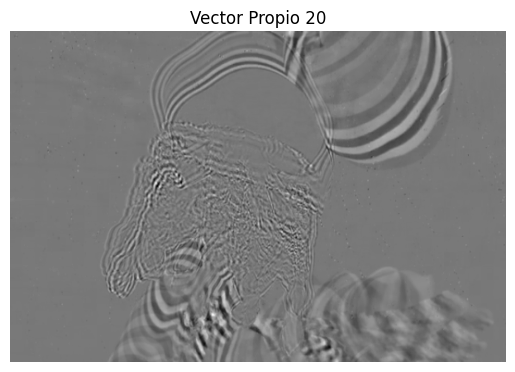

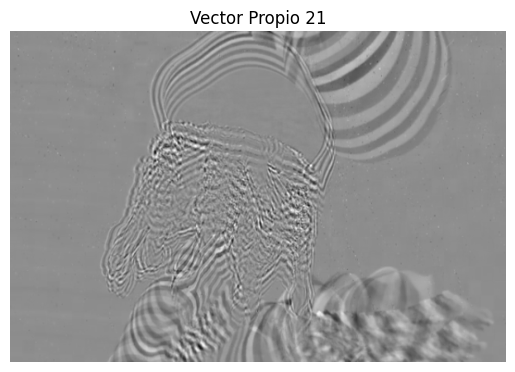

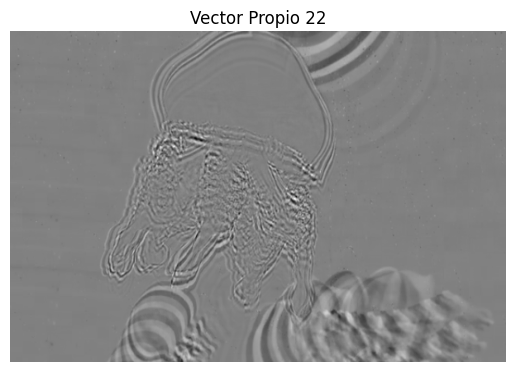

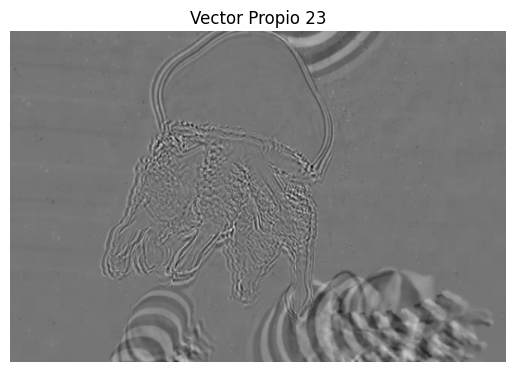

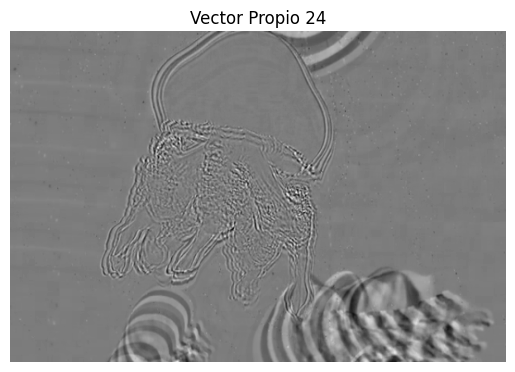

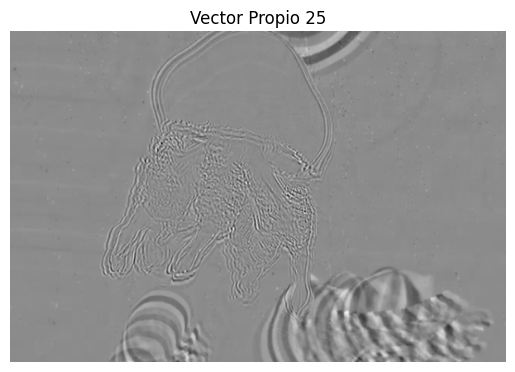

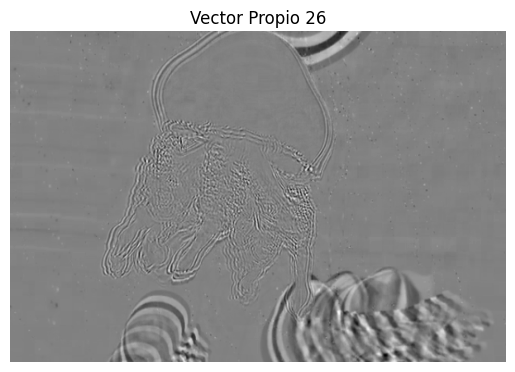

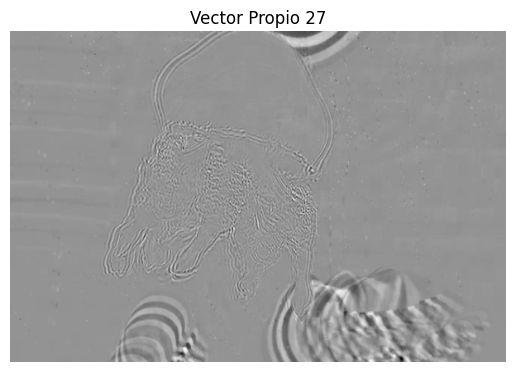

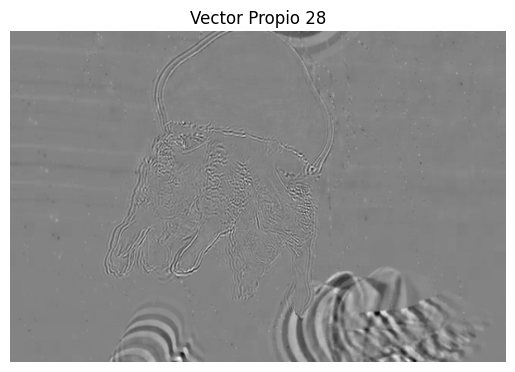

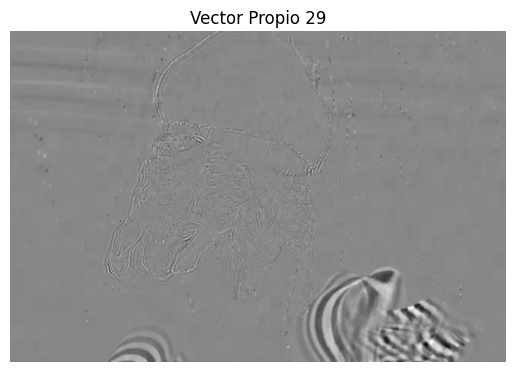

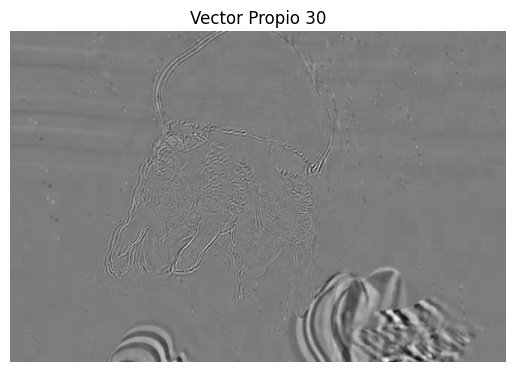

In [7]:

def optimize_eigenimages(iteration, eigenvectors, width, height):
    if iteration >= eigenvectors.shape[1]:
        return

    # Obtén el vector propio actual
    eigenimage = eigenvectors[:, iteration]

    # Escala el vector propio al rango [0, 1]
    eigenimage = (eigenimage - eigenimage.min()) / (eigenimage.max() - eigenimage.min())

    # Crea una figura para mostrar el vector propio
    plt.figure()
    plt.imshow(eigenimage.reshape(height, width), cmap='gray')
    plt.title(f'Vector Propio {iteration + 1}')
    plt.axis('off')
    plt.show()

    # Llama recursivamente para el siguiente vector propio
    optimize_eigenimages(iteration + 1, eigenvectors, width, height)

# Ejecutando para los vectores propios de A_AT
width, height = 600, 400
optimize_eigenimages(0, eigvectors_AAT, width, height)


# Conclusión:

### Se puede notar que el primer vector propio calcula las zonas del video donde hay mayor variación, y el último calcula las zonas donde hay menor variación. Con un poco de análisis adicional, este método se utilzia en análisis de video para encontrar el fondo y detectar las zonas con mayor movimiento.